In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv('/Users/christooicey/Downloads/python-portfolio-project-starter-files/insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
data.shape

(1338, 7)

In [8]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
#get relations between values #visuals

data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


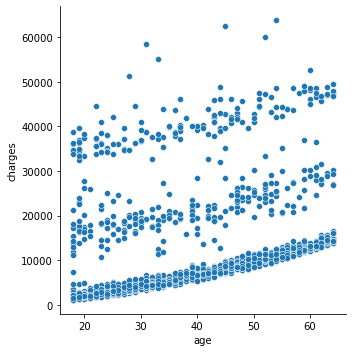

In [11]:
sns.relplot(x='age', y='charges', data=data)

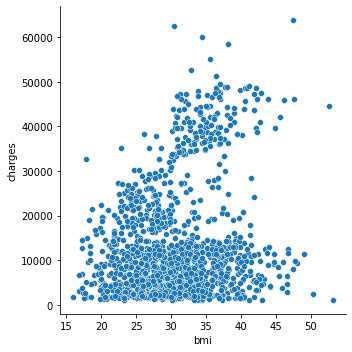

In [12]:
sns.relplot(x='bmi', y='charges', data=data)

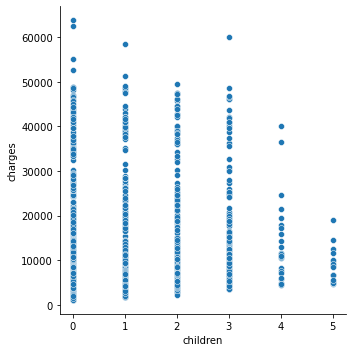

In [13]:
sns.relplot(x='children', y='charges', data=data)

In [14]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
data['sex']=data['sex'].map({'female':0, 'male':1})

In [17]:
data['smoker']=data['smoker'].map({'yes':1, 'no':1})

In [18]:
data['region']=data['region'].map({'southwest':1, 'southeast':2, 'northwest':3,'northeast':4})

In [19]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [21]:
train = data.drop(['charges'], axis=1)
test = data['charges']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.2, random_state=42)

In [23]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,1,3
1285,47,0,24.320,0,1,4
1142,52,0,24.860,0,1,2
969,39,0,34.320,5,1,2
486,54,0,21.470,3,1,3
...,...,...,...,...,...,...
1095,18,0,31.350,4,1,4
1130,39,0,23.870,5,1,2
1294,58,1,25.175,0,1,4
860,37,0,47.600,2,1,1


In [24]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [25]:
regr = LinearRegression()
regr.fit(X_train, y_train)
svm = SVR()
svm.fit(X_train, y_train)
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train, y_train)

GradientBoostingRegressor()

In [26]:
y_pred1 = regr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

dfl = pd.DataFrame({'Actual':y_test, 'regr':y_pred1,
                  'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [27]:
dfl

,Actual,regr,svm,rf,gr
764,9095.06825,13091.606193,9548.040525,12848.604432,14052.602903
887,5272.17580,11307.596409,9491.832576,13483.794482,10660.136828
890,29330.98315,16435.696172,9649.071132,25139.216483,18297.556703
1293,9301.89355,15034.945401,9554.880091,13891.072286,13802.056350
259,33750.29180,9512.727351,9419.182747,9495.026629,10967.022713
...,...,...,...,...,...
109,47055.53210,19987.720822,9649.234464,24644.212125,20975.036770
575,12222.89830,15205.015076,9625.779263,13697.083795,13621.288459
535,6067.12675,13283.014038,9503.579438,15636.047539,11408.303150
543,63770.42801,20874.456605,9604.997480,12903.252658,19487.515331


In [28]:
import matplotlib.pyplot as plt

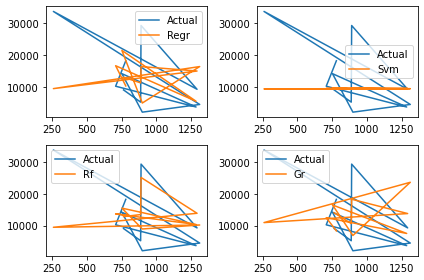

In [29]:
plt.subplot(221)
plt.plot(dfl['Actual'].iloc[0:11] ,label='Actual')
plt.plot(dfl['regr'].iloc[0:11] ,label='Regr')
plt.legend()

plt.subplot(222)
plt.plot(dfl['Actual'].iloc[0:11] ,label='Actual')
plt.plot(dfl['svm'].iloc[0:11] ,label='Svm')
plt.legend()

plt.subplot(223)
plt.plot(dfl['Actual'].iloc[0:11] ,label='Actual')
plt.plot(dfl['rf'].iloc[0:11] ,label='Rf')
plt.legend()

plt.subplot(224)
plt.plot(dfl['Actual'].iloc[0:11] ,label='Actual')
plt.plot(dfl['gr'].iloc[0:11] ,label='Gr')

plt.tight_layout()


plt.legend()

In [30]:
from sklearn import metrics

In [31]:
score1 = metrics.r2_score(y_test,y_pred1)
score2 = metrics.r2_score(y_test,y_pred2)
score3 = metrics.r2_score(y_test,y_pred3)
score4 = metrics.r2_score(y_test,y_pred4)

In [32]:
print(score1, score2, score3, score4)

0.15931617036190215 -0.07229976365939517 0.026922404886650986 0.06792267545818853


In [33]:
s1 = metrics.mean_absolute_error(y_test,y_pred1)
s2 = metrics.mean_absolute_error(y_test,y_pred2)
s3 = metrics.mean_absolute_error(y_test,y_pred3)
s4 = metrics.mean_absolute_error(y_test,y_pred4)

In [34]:
print(s1, s2, s3, s4)

9112.228637531389 8592.126453328554 9461.930730451337 9462.86666038805


In [35]:
data ={'age':40,
      'sex':1,
      'bmi': 40.30,
      'children':4,
      'smoker':1,
      'region':2}

df = pd.DataFrame(data,index=[0])
df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [36]:
new_pred = rf.predict(df)
print(new_pred)

[20879.0519725]


In [37]:
rf = RandomForestRegressor()
rf.fit(train, test)

RandomForestRegressor()

In [38]:
import joblib

In [39]:
joblib.dump(rf,'model_joblib_rf')

['model_joblib_rf']

In [40]:
model = joblib.load('model_joblib_rf')

In [41]:
model.predict(df)

array([22002.3344249])

In [42]:
from tkinter import *

In [43]:
import joblib

In [44]:
def show_entry():
    
    p1 = float(e1.get())
    p2 = float(e2.get())
    p3 = float(e3.get())
    p4 = float(e4.get())
    p5 = float(e5.get())
    p6 = float(e6.get())
    
    model = joblib.load('model_joblib_rf')
    result = model.predict([p1,p2,p3,p4,p5,p6])
    
    Label(master, text = "Insurance Cost").grid(row=7)
    Label(master, text = result).grid(row=8)


master = Tk()
master.title("Insurance Cost Prediction")
label = Label(master,text = "Insurance Cost Prediction",bg = "black",
             fg = "white").grid(row=0,columnspan=2)

Label(master,text = "Enter Your Age" ).grid(row=1)
Label(master,text = "Male or Female[1/0]" ).grid(row=2)
Label(master,text = "Enter Your BMI Value").grid(row=3)
Label(master,text = "Enter Number Of Children").grid(row=4)
Label(master,text = "Smoker Yes/No [1/0]").grid(row=5)
Label(master,text = "Region [1-4]").grid(row=6)

e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)


e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1) 
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1) 

Button(master,text="Predict",command=show_entry).grid()



mainloop()

/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/kj/rmmffxks0ts1xdhp7r35_g3c0000gn/T/ipykernel_1446/3963223963.py", line 11, in show_entry
    result = model.predict([p1,p2,p3,p4,p5,p6])
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 971, in predict
    X = self._validate_X_predict(X)
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 579, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr", reset=False)
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/skl

/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/kj/rmmffxks0ts1xdhp7r35_g3c0000gn/T/ipykernel_1446/3963223963.py", line 11, in show_entry
    result = model.predict([p1,p2,p3,p4,p5,p6])
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 971, in predict
    X = self._validate_X_predict(X)
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 579, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr", reset=False)
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/skl

/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/kj/rmmffxks0ts1xdhp7r35_g3c0000gn/T/ipykernel_1446/3963223963.py", line 11, in show_entry
    result = model.predict([p1,p2,p3,p4,p5,p6])
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 971, in predict
    X = self._validate_X_predict(X)
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 579, in _validate_X_predict
    X = self._validate_data(X, dtype=DTYPE, accept_sparse="csr", reset=False)
  File "/Users/christooicey/opt/anaconda3/lib/python3.9/site-packages/skl